In [13]:
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv('delay_flights.csv')

In [3]:
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,DEP_DELAY_NEW,CANCELLED,PRCP,SNWD,TMIN,TAVG,AWND
0,1,6,7,"Atlanta, GA",0.0,0.0,0.00,0.0,43.0,53.0,6.49
1,1,6,7,"Atlanta, GA",0.0,0.0,0.00,0.0,43.0,53.0,6.49
2,1,6,7,"Atlanta, GA",0.0,0.0,0.00,0.0,43.0,53.0,6.49
3,1,6,7,"Atlanta, GA",12.0,0.0,0.00,0.0,43.0,53.0,6.49
4,1,6,7,"Atlanta, GA",8.0,0.0,0.00,0.0,43.0,53.0,6.49
...,...,...,...,...,...,...,...,...,...,...,...
6579956,12,29,7,"Anchorage, AK",0.0,0.0,0.02,7.1,11.0,15.0,7.83
6579957,12,29,7,"Anchorage, AK",0.0,0.0,0.02,7.1,11.0,15.0,7.83
6579958,12,29,7,"Anchorage, AK",0.0,0.0,0.02,7.1,11.0,15.0,7.83
6579959,12,29,7,"Anchorage, AK",0.0,0.0,0.02,7.1,11.0,15.0,7.83


#### Columns significations

- _MONTH_: Month
- _DAY_OF_MONTH_: Day of the month (1-31)
- _DAY_OF_WEEK_: Day of Week
- _ORIGIN_CITY_NAME_: Origin city name
- _DEP_DELAY_NEW_: Departure delay in minutes
- _CANCELLED_: Flag if flight was cancelled
- _PRCP_: Inches of precipitation for day
- _SNWD_: Inches of snow on ground for day
- _TMIN_: Min temperature for day
- _TAVG_: Average temperature for day
- _AWND_: Max wind speed for day

In [4]:
data = data[(data['DEP_DELAY_NEW'] > 0.) | (data['CANCELLED'] == 1.)]
data = data[['MONTH', 'DAY_OF_MONTH', 'DEP_DELAY_NEW', 'CANCELLED', 'PRCP', 'SNWD', 'TMIN', 'TAVG', 'AWND']]

In [5]:
data

,MONTH,DAY_OF_MONTH,DEP_DELAY_NEW,CANCELLED,PRCP,SNWD,TMIN,TAVG,AWND
3,1,6,12.0,0.0,0.00,0.0,43.0,53.0,6.49
4,1,6,8.0,0.0,0.00,0.0,43.0,53.0,6.49
7,1,6,5.0,0.0,0.00,0.0,43.0,53.0,6.49
23,1,6,3.0,0.0,0.00,0.0,43.0,53.0,6.49
28,1,6,2.0,0.0,0.00,0.0,43.0,53.0,6.49
...,...,...,...,...,...,...,...,...,...
6579937,12,29,4.0,0.0,0.02,7.1,11.0,15.0,7.83
6579940,12,29,68.0,0.0,0.02,7.1,11.0,15.0,7.83
6579941,12,29,11.0,0.0,0.02,7.1,11.0,15.0,7.83
6579949,12,29,2.0,0.0,0.02,7.1,11.0,15.0,7.83


In [6]:
def histcount(df, state='both', weather='PRCP', timeline='year', month=1, day=1):
    df = df[['MONTH', 'DAY_OF_MONTH', 'DEP_DELAY_NEW', 'CANCELLED', weather]]
    
    if timeline == 'day':
        df = df[(df['MONTH'] == month) & (df['DAY_OF_MONTH'] == day)]
    elif timeline == 'month':
        df = df[(df['MONTH'] == month)]
    
    if state == 'delayed':
        return px.histogram(df[df['DEP_DELAY_NEW'] > 0.], x=weather)
    elif state == 'cancelled':
        return px.histogram(df[df['CANCELLED'] == 1.], x=weather)
    else:
        return px.histogram(df, x=weather)

In [14]:
fig = histcount(data, weather='TMIN', timeline='month')

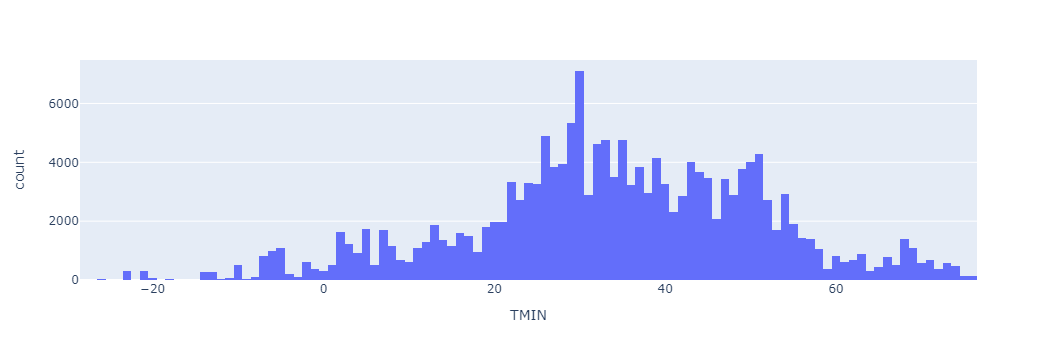

In [15]:
fig